## 2 . Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio. Além disso,  responda também às seguintes perguntas de negócio:
## Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
## Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
## Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


# Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Poderíamos responder essa pergunta de várias formas diferentes, já que o "melhor" é algo um pouco relativo, ainda mais considerando o contexto de negócios, um estado poderia ter um bom mercado para carros populares, mas muitos concorrentes fortes tirando assim o peso desse estado na hora de respondermos a pergunta sobre qual seria o melhor estado para vender carros populares. Um estado pode não ter concorrentes mas ter uma demanda pequena tirando novamente o peso do estado na hora se respondermos a pergunta entre outras situações possíveis.

Aqui vamos fazer a suposição de que o melhor estado para se vender um carro popular seja o estado que tenha a maior frequência de carros com preço baixo, mas poderiamos analisar o melhor estado em termos de outras coisas.

#### Box plot do preço de acordo com o estado

In [56]:
# importando as bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_train = pd.read_excel("cars_train.xlsx")

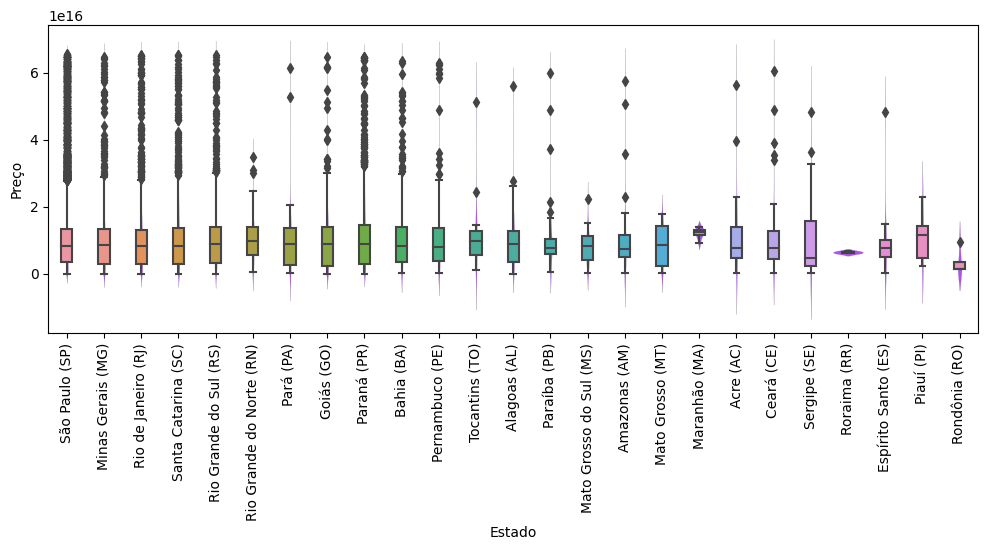

In [58]:
#estado_preco = pd.DataFrame(df_train[['estado_vendedor','preco']].melt() )
estad_preco = df_train[['estado_vendedor','preco']]
plt.figure(figsize=(12,4))
ax = sns.violinplot(data = estad_preco, x='estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=estad_preco, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.xticks(rotation = 90)
plt.ylabel('Preço')
plt.xlabel('Estado')
plt.show()

Observando o boxplot do preço de venda em cada estado podemos ter uma noção sobre a distribuição dos preços de vendas em cada estado e uma noção da variância do preço entre as cidades daquele estado através da distância interquartil, é importante lembrar que estamos DESCONSIDERANDO o modelo do carro, sua versão, ano de fabricação, marca e as outras features deste box plot. E o mercado de venda de carros de cada região muito provavelmente é diferente, então não podemos generalizar a nossas interpretações dizendo que "Em Rondônia o preço dos carros é mais barato, e carros em São Paulo são mais caros" já que o mercado de carros em Rondônia é diferente de São Paulo, em Rondônia pode haver uma maior demanda por carros de um determinado modelo de menor preço e um mercado menor quando comparado a São Paulo e em São Paulo pode haver a mesma demanda pelo mesmo modelo em Rondônia podendo ou não estar na mesma faixa de preço, mas em São Paulo temos uma população maior gerando um mercado maior com diferentes demandas de diferentes modelos de carros adicionando assim mais variação nos preços dos carros. \
 Essa informação é importante de se levar em conta na hora da precificação e negociação.

Segundo o boxplot a maioria dos Estados tem uma mediana de preços bastante próxima, e uma distância interquartil bastante próxima, com o estado com o maior número de outliers e uma das maiores distâncias interquartil sendo São Paulo e o estado com menor número de outliers e menor distãncia interquartil sendo Roraima.  

Considerando que o melhor estado para vender carro popular seja o estado com os menores preços os nossos melhores candidatos são Rondônia, Roraima, Piauí, Maranhão, Acre, Ceará, Sergipe, Sergipe, Maranhão, Espirito Santo e os outros estados tem distribuição parecida então decidimos incluir São Paulo por ter mais vendas.

Da parte 1 da nossa análise temos a porcentagem que cada estado representava do nosso dataset.

In [59]:
frequencia_estado = pd.DataFrame(df_train.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),16378,55.361006
Rio de Janeiro (RJ),2548,8.612764
Paraná (PR),2526,8.538399
Santa Catarina (SC),2302,7.781233
Minas Gerais (MG),1775,5.999865
Rio Grande do Sul (RS),1646,5.563818
Goiás (GO),789,2.666982
Bahia (BA),604,2.041644
Pernambuco (PE),318,1.074905


Vamos considerar que em São Paulo os carros com preços menores que a mediana dos preços de carros em São Paulo são carros populares e vamos observar a frequencia desse tipo de observação.

In [60]:
sp =  df_train[df_train['estado_vendedor']== 'São Paulo (SP)']
meidana_sp = sp['preco'].quantile(.5)

sp_preco_menor_mediana = sp[sp['preco'] < meidana_sp]

# Get the frequency of observations below the quartile value
freq_carros_menor_med = len(sp_preco_menor_mediana)

print("Quantidade de carros com preço popular no Estado de São Paulo:", freq_carros_menor_med)

Quantidade de carros com preço popular no Estado de São Paulo: 8189


### Considerando que o melhor estado seja o estado com menor preço o estado de Rondônia ganhou, mas temos apenas duas observações deste estado ou seja um problema de notificação deste estado no dataset, então essa conclusão é bastante perigosa, o mesmo acontece com os outros estados candidatos. Considerando que seja o melhor estado seja em termos do menor preço e maior frequencia de vendas no dataset o estado de São Paulo ganha, pois os carros populares em São Paulo corresponde a aproximadamente 25% do dataset(8189).

### O mais aconselhável seria dizer que São Paulo seria o melhor estado para vender carros populares, já que temos mais informação sobre esse estado em comparação aos outros. Mas muito provavelmente em termos de negócios deve ter muitos concorrentes e mais análises deveriam ser feitas para conseguirmos responder outras perguntas relacionadas a negócios com segurança.

# Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

Novamente a pergunta é um pouco relativa, e se for importante a picape com transmissão automática ter garantia, revisão em dia, 4 portas, vendedor confiável, ... entre outras variáveis.

Neste caso vamos considerar que o melhor estado para se comprar uma picape com transmissão automática seja o estado que tenha os menores preços de picapes com transmissão automática.

Para isso podemos selecionar as picapes com transmissão automática e visualizar a distribuição de preços.

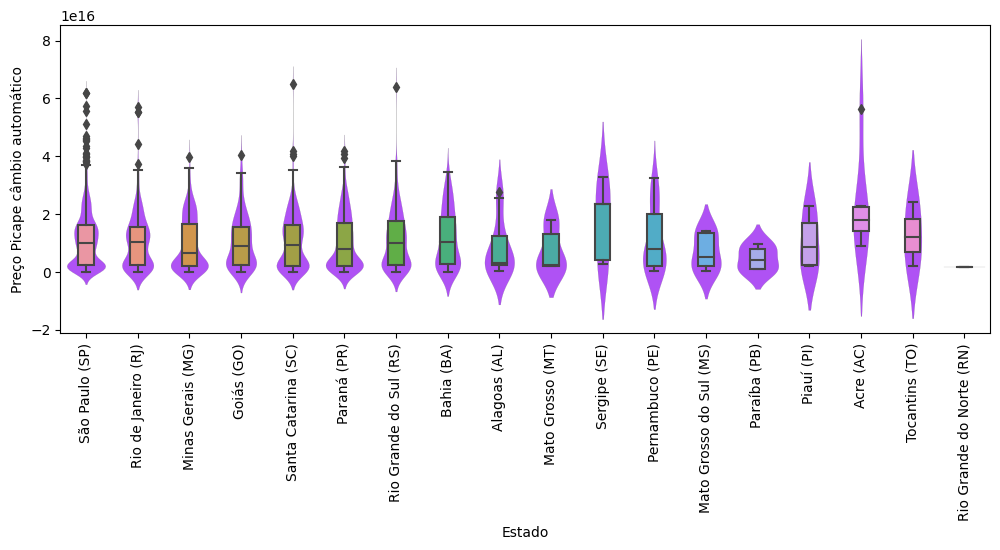

In [61]:
picape_transm_automatica = df_train[df_train['tipo']=='Picape']
picape_transm_automatica = picape_transm_automatica[picape_transm_automatica['cambio']=='Automática']

plt.figure(figsize=(12,4))

ax = sns.violinplot(data = picape_transm_automatica,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=picape_transm_automatica, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço Picape câmbio automático')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

Novamentes temos os estados na região Norte e nordeste sendo candidatos a melhor estado, mas novamente temos o problema de ter poucas observações destes estados tornando a decisão insegura.

In [62]:
print('Quantidade de picapes com transmissão automática em Paraíba:',
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Paraíba (PB)']))

Quantidade de picapes com transmissão automática em Paraíba: 4


In [63]:
print('Quantidade de picapes com transmissão automática em Mato Grosso:', 
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Mato Grosso (MT)']))

Quantidade de picapes com transmissão automática em Mato Grosso: 6


In [64]:
print('Quantidade de picapes com transmissão automática em Alagoas:',
len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='Alagoas (AL)']) )

Quantidade de picapes com transmissão automática em Alagoas: 12


In [65]:
print('Quantidade de picapes com transmissão automática em São Paulo:',
    len(picape_transm_automatica[picape_transm_automatica['estado_vendedor']=='São Paulo (SP)']) )

Quantidade de picapes com transmissão automática em São Paulo: 1712


### O melhor estado para comprar uma Picape com transmissão automática é São Paulo, considerando que nosso critério seja a menor distribuição de preços e maior confiabilidade, ou seja mais informação sobre aquele estado. Desconsiderando a confiabilidade o melhor estado seria Alagoas ou Mato Grosso. Mas caso outros critérios sejam importantes como por exemplo garantia, revisão na concessionário etc. teríamos que aprofundar mais a nossa pesquisa para responder adequadamente.

# Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Novamente é relativo, mas vamos considerar que o melhor estado seja o estado com maior número de carros dentro da garantia de fábrica e possua os menores preços.

In [66]:
dentro_garantia = df_train[df_train['garantia_de_fábrica']=='Garantia de fábrica']

frequencia_estado = pd.DataFrame(dentro_garantia.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),2307,52.852234
Rio de Janeiro (RJ),412,9.438717
Paraná (PR),389,8.911798
Santa Catarina (SC),330,7.560137
Rio Grande do Sul (RS),281,6.437572
Minas Gerais (MG),264,6.048110
Goiás (GO),186,4.261168
Alagoas (AL),58,1.328751
Bahia (BA),51,1.168385


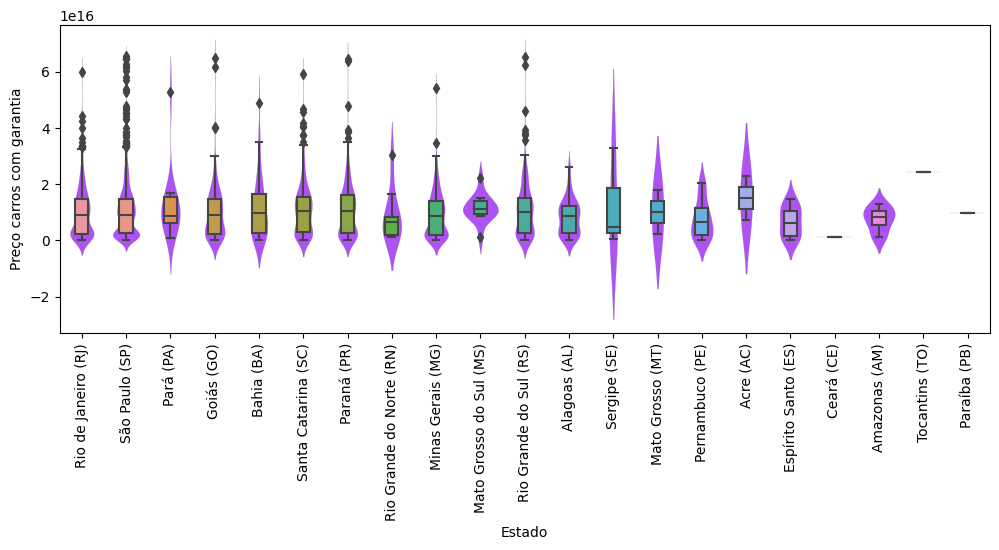

In [67]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = dentro_garantia,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=dentro_garantia, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço carros com garantia')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

### O melhor estado para comprar carro com garantia de fábrica é Rio de Janeiro porque é o estado com maior frequencia de preços baixos e menor distância interquartil quando comparado com outros estados indicando menor variação de preços, alguns possíveis concorrentes seriam São Paulo e Pára, considerando que o estado com maior número de carros dentro da garantia de fábrica e menores preços seja o melhor. Mas se outras variáveis fossem importantes nessa escolha teríamos que nos aprofundar ainda mais na nossa análise.

# Hipóteses propostas:

# Quais estados fizeram mais revisões nas concessionárias ?

Essa pergunta pode ser importante pois revender um carro que tenha problemas técnicos poderia fazer mal para a imagem do negócio, então vamos considerar o estado mais seguro o estado com maior número de carros que fizeram revisão na concessionária

In [68]:
revisao_conc = df_train[df_train['revisoes_concessionaria']=='Todas as revisões feitas pela concessionária']

frequencia_estado = pd.DataFrame(revisao_conc.estado_vendedor.value_counts())
soma = sum(frequencia_estado['count'])
frequencia_estado['porcentagem']=[(i/soma)*100 for i in frequencia_estado['count']]
frequencia_estado

,count,porcentagem
estado_vendedor,,
São Paulo (SP),5156,56.214566
Rio de Janeiro (RJ),811,8.842128
Paraná (PR),735,8.013519
Santa Catarina (SC),716,7.806367
Rio Grande do Sul (RS),682,7.435674
Minas Gerais (MG),560,6.105539
Goiás (GO),233,2.540340
Bahia (BA),86,0.937636
Alagoas (AL),51,0.556040


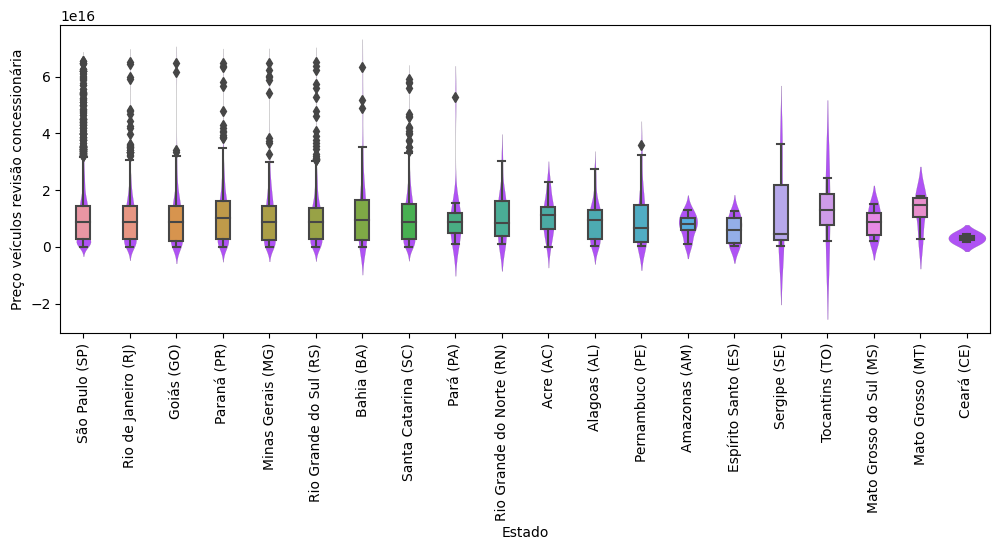

In [69]:

plt.figure(figsize=(12,4))
ax = sns.violinplot(data = revisao_conc,x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=revisao_conc, x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço veículos revisão concessionária')
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.show()

### Não é possível detectar uma diferença gritante entre as distribuições, ainda mais considerando que os estado mais a direita do gráfico possue menos observações, segundo os dados nenhum estado é mais perigoso nesse quesito, São Paulo, Rio de Janeiro e Goiás são os três estados com mais revisões em concessionárias então seriam os candidatos a serem mais seguros nesse quesito da revisão em concessionária. Naturalmente estes estados poderiam ser os estados com maior número de revisões em concessionárias por terem mais observações no banco de dados, então seria legal comparar os estados em termos de porcentagem de veículos que fizeram revisões em concessionárias.

Vamos considerar que os dados faltantes na coluna revisoes_concessionaria significam que não houve revisões nas concessionárias já que ela é uma variável dicotômica e as únicas observações dela indicam que houve revisão.

In [70]:
df_train['revisoes_concessionaria'] = df_train['revisoes_concessionaria'].fillna('Não foram todas as revisões feitas em concessionárias')
revisao_porc = df_train.groupby(['estado_vendedor'])['revisoes_concessionaria'].value_counts().reset_index(name='Count')
group_sums = revisao_porc.groupby('estado_vendedor')['Count'].sum()
revisao_porc['Percentage'] = revisao_porc.apply(lambda row: row['Count'] / group_sums[row['estado_vendedor']] * 100, axis=1)

revisao_porc

,estado_vendedor,revisoes_concessionaria,Count,Percentage
0,Acre (AC),Todas as revisões feitas pela concessionária,17,58.620690
1,Acre (AC),Não foram todas as revisões feitas em concessi...,12,41.379310
2,Alagoas (AL),Não foram todas as revisões feitas em concessi...,74,59.200000
3,Alagoas (AL),Todas as revisões feitas pela concessionária,51,40.800000
4,Amazonas (AM),Não foram todas as revisões feitas em concessi...,41,80.392157
5,Amazonas (AM),Todas as revisões feitas pela concessionária,10,19.607843
6,Bahia (BA),Não foram todas as revisões feitas em concessi...,518,85.761589
7,Bahia (BA),Todas as revisões feitas pela concessionária,86,14.238411
8,Ceará (CE),Não foram todas as revisões feitas em concessi...,67,97.101449
9,Ceará (CE),Todas as revisões feitas pela concessionária,2,2.898551


### Observando a tabela podemos verificar a quantidade em números e a porcentagem de carros que fizeram revisão nas concessionárias para compararmos, não é a forma mais eficiente de se visualizar esta contagem mas é útil porque alguns estados tem poucas observações o que atrapalha no calculo da porcentagem e essa informação é importante, mas entre os três primeiros estados com mais revisões cerca de trinta porcento dos veículos fizeram a revisão nas concessionárias que é uma padrão que aparece entre os estados mais populosos.

# As categorias mais vendidos possuem os menores preços?

Essa pergunta é importante para termos uma noção do preço das categorias de carros mais vendidos, e se eles variam muito ou não e se realmente existe a relação de que quanto mais frequente a categoria do carro no banco de dados mais barato é o preço do carro.

Usando a categoria criada na parte 1:

In [71]:
# Create a new variable by combining Feature1 and Feature2
df_train['categoria'] = df_train['marca'].astype(str)+df_train['tipo'].astype(str) +\
df_train['modelo'].astype(str) + df_train['cambio'].astype(str)  + \
df_train['ano_de_fabricacao'].astype(str) + df_train['num_portas'].astype(str) + \
df_train['cor'].astype(str)

Como tem muitas categorias de carros vamos observar os 20 mais frequentes

In [72]:
categoria_freq = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
categoria_freq= categoria_freq.iloc[0:20,:]

In [73]:
list(categoria_freq['categoria'])

['PEUGEOTSedã2008Automática20214Branco',
 'PEUGEOTSedã2008Automática20204Branco',
 'JEEPSedãCOMPASSAutomática20194Branco',
 'FIATPicapeTOROAutomática20204Branco',
 'JEEPSedãCOMPASSAutomática20174Branco',
 'JEEPSedãCOMPASSAutomática20184Branco',
 'JEEPSedãCOMPASSAutomática20204Branco',
 'AUDISedãQ3Automática20174Branco',
 'PEUGEOTSedã2008Automática20194Branco',
 'VOLKSWAGENHatchbackPOLOAutomática20194Branco',
 'BMWSedã320iAutomática20174Branco',
 'PEUGEOTSedã2008Automática20204Prata',
 'FIATPicapeTOROAutomática20194Branco',
 'VOLKSWAGENSedãT-CROSSAutomática20204Branco',
 'FIATPicapeTOROAutomática20184Branco',
 'PEUGEOTSedã2008Automática20214Prata',
 'FIATPicapeTOROAutomática20174Branco',
 'CHEVROLETSedãONIXAutomática20204Branco',
 'JEEPSedãCOMPASSAutomática20204Cinza',
 'AUDISedãQ3Automática20144Branco']

In [74]:
categoria_20 = df_train[df_train['categoria'].isin(categoria_freq['categoria'])]

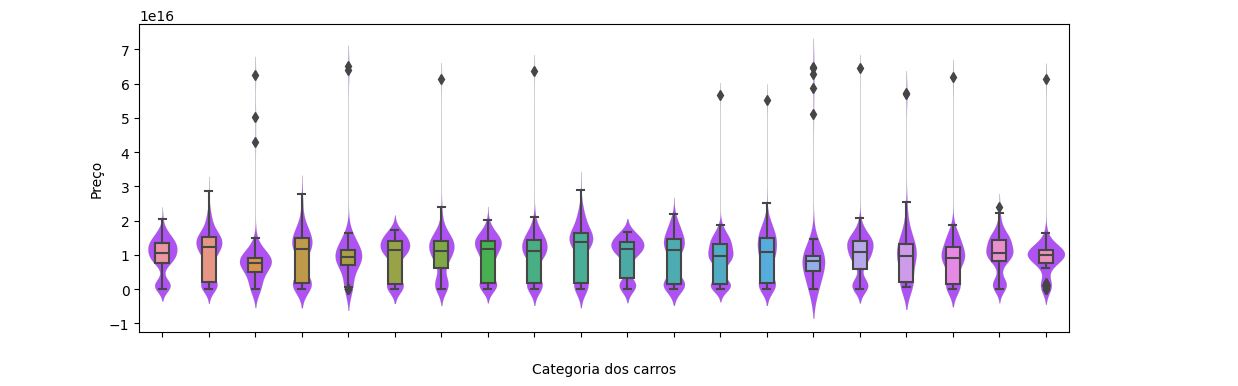

In [75]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = categoria_20, x = 'categoria', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=categoria_20 , x='categoria', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço')
plt.xticks(color='White')
plt.xlabel('Categoria dos carros')
plt.show()

Observe as categorias abaixo:

In [76]:
categoria_20 = df_train['categoria'].value_counts().rename_axis('categoria').reset_index(name='counts')
soma_count = sum(categoria_20['counts']) 
categoria_20['Porcentagem'] = [(i/soma_count)*100 for i in categoria_20['counts']]
categoria_20= categoria_20.iloc[0:20,:]
categoria_20.head(20)

,categoria,counts,Porcentagem
0,PEUGEOTSedã2008Automática20214Branco,367,1.240535
1,PEUGEOTSedã2008Automática20204Branco,314,1.061385
2,JEEPSedãCOMPASSAutomática20194Branco,260,0.878853
3,FIATPicapeTOROAutomática20204Branco,217,0.733505
4,JEEPSedãCOMPASSAutomática20174Branco,216,0.730124
5,JEEPSedãCOMPASSAutomática20184Branco,211,0.713223
6,JEEPSedãCOMPASSAutomática20204Branco,188,0.635479
7,AUDISedãQ3Automática20174Branco,175,0.591536
8,PEUGEOTSedã2008Automática20194Branco,175,0.591536
9,VOLKSWAGENHatchbackPOLOAutomática20194Branco,151,0.510411


### Podemos perceber que a terceira categoria de carro mais vendida, a quinta e a vigésima possui menores preços em geral quando comparado com as outras categorias, mas em geral as categorias possuem distribuição de preço parecida, pelo menos entre as vinte categorias mais vendidas.

# O preço da categoria de carros mais vendidos varia de acordo com o estado?

Essa é uma hipótese importante pois se tivermos diferenças de preços dos carros entre os estados é possível lucrar mais vendendo um carro neste estado em específico que paga mais por aquela categoria de carro, a mudança de preço pode ser devida a várias razões, como por exemplo uma determinada categoria de carro ser mais adequada determinado tipo de bioma naquele estado e assim gera uma maior demanda e pela lei da oferta e demanda o preço pode aumentar.

Vamos testar para a picape toro da fiate, a quarta categoria mais vendida.

In [77]:
fiat_toro = df_train[df_train['categoria'] == 'FIATPicapeTOROAutomática20204Branco']

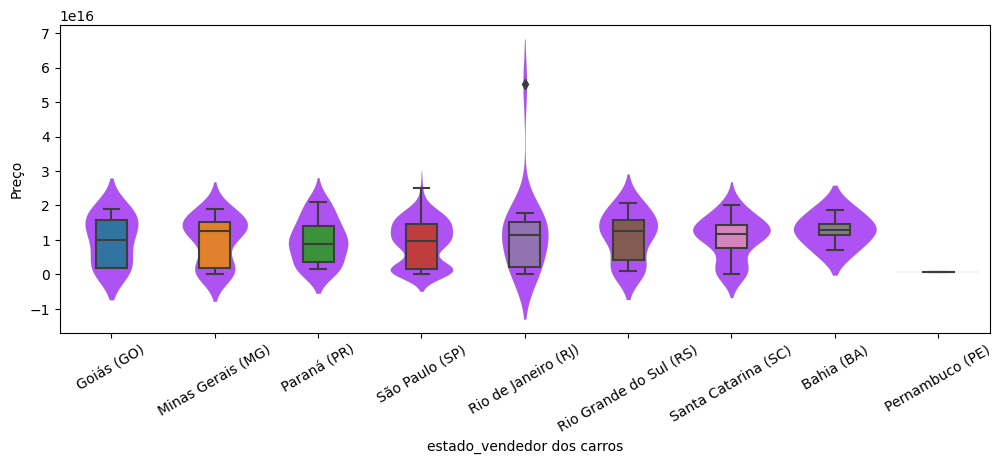

In [79]:
plt.figure(figsize=(12,4))

ax = sns.violinplot(data = fiat_toro, x = 'estado_vendedor', y='preco', color="#af52f4", inner=None, linewidth=0.1, saturation=2)
sns.boxplot(data=fiat_toro , x='estado_vendedor', y='preco', width=0.3,
             boxprops={'zorder': 2}, ax=ax)
plt.ylabel('Preço')
plt.xticks(rotation = 30)
plt.xlabel('estado_vendedor dos carros')
plt.show()

### Aparentemente na Bahia temos uma maior frequência de preços mais altos para a picape fiat toro, e distribuição com maior frequencia de preços mais altos em Santa Catarina, Rio Grande do Sul e Rio de Janeiro também quando comparado ao preço em outros estados.

# Obrigado pela atenção!!!